In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def SIR_Full(u, t, alpha, beta, gamma, delta, mu):
    du = np.zeros(3)
    du[0] = alpha - beta*u[0]*u[1] - mu*u[0]
    du[1] = beta * u[0]*u[1] - (mu + gamma + delta) * u[1]
    du[2] = delta * u[1] - mu * u[2]
    return du

Text(0, 0.5, 'Population size')

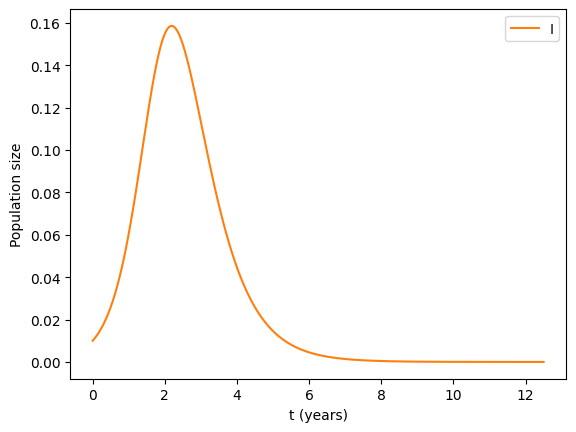

In [6]:
R0 = 2
mu = 1. / (75*52)
gamma = 0 #10*mu 
delta = 1.0 /2
alpha = mu
beta = R0 * mu * (mu + gamma + delta) / alpha

t = np.linspace(0, 50, 40001)

u = odeint(SIR_Full, [.99, .01, 0], t, args=(alpha, beta, gamma, delta, mu))

#plt.plot(t/52., u[:,0], color='C0', label="S")
plt.plot(t/4., u[:,1], color='C1', label="I")
#plt.plot(t/52., u[:,2], color='C2', label="R")
#plt.plot(t/52., np.sum(u, axis=1), color='C3', label="T")
plt.legend()
plt.xlabel("t (years)")
plt.ylabel("Population size")

In [16]:
u[-1,:]

array([ 2.17115321e-01, -1.07947052e-10,  7.82884679e-01])

In [5]:
def SIR(u, t, R0, rho):
    du = np.zeros(2)
    du[0] = 1 - R0*u[0]*u[1] - u[0]
    du[1] = rho * (R0*u[0]*u[1] - u[1])
    return du

def SIR_CP(u, t, R0):
    du = np.zeros(2)
    du[0] = -R0*u[0]*u[1]
    du[1] = R0*u[0]*u[1] - u[1]
    return du


# Modelo SIR normal

$$
    R_0 = \frac{\alpha \beta}{\mu(\mu + \gamma + \delta)}, \quad \rho = \frac{\mu + \gamma + \delta}{\mu}
$$

2000


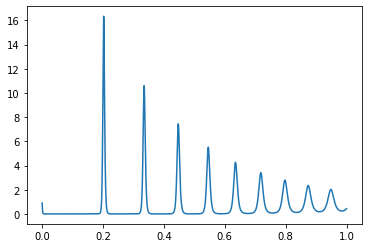

In [5]:

R0 = 5
rho = 2000
print(rho)

t = np.linspace(0, 1, 5000000)

u = odeint(SIR, [.1, .9], t, args=(R0, rho))
plt.plot(t, u[:,1], color='C0')

#plt.plot([1/R0], [1-1/R0], 'o', color='C1')

#plt.axis([0,1,0,1])

In [106]:
mu = 1 / (70*52)
delta = 0
gamma = 1/2
rho = (mu + gamma + delta)/mu

print(mu, gamma, rho)

0.0002747252747252747 0.5 1821.0


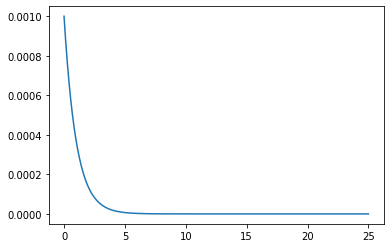

In [37]:
R0 = .001

t = np.linspace(0, 25, 10000)

u = odeint(SIR_CP, [.999, .001], t, args=(R0,))
plt.plot(t, u[:,1])